In [1]:
import pandas as pd
import numpy as np

# 1) Load raw data
df = pd.read_csv('/home/kamiar/chevron/Acid-neural-net/data/test_data_nn(SampleData_07032025_vf3).csv')

# 2) Define columns by position
input_cols   = df.columns[3:20]    # Inputs 1–17
f4_col       = df.columns[24]      # F4 → Input 18
output_col   = df.columns[20]      # Output
quality_cols = df.columns[22:24]   # F2, F3

# 3) Subset and rename
df_selected = df[list(input_cols) + [f4_col] + [output_col] + list(quality_cols)]
df_selected = df_selected.rename(columns={f4_col: 'Input 18'})

# 3.5) Coerce any non-numeric cell to NaN
for col in df_selected.columns:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')

# 4) Remove rows with >1 missing
missing_counts   = df_selected.isna().sum(axis=1)
removed_indices  = missing_counts[missing_counts > 1].index.tolist()
print("Removed row indices (dropped entirely):", removed_indices)

df_cleaned = df_selected[missing_counts <= 1].reset_index(drop=True)
print(f"Total cleaned rows (≤1 missing): {len(df_cleaned)}")

# 5) Identify fully complete rows (no missing values)
complete_mask = df_cleaned.notna().all(axis=1)
complete_df   = df_cleaned[complete_mask]
print(f"Fully complete rows (0 missing): {len(complete_df)}")

# 6) Sample 15% of those complete rows for the test set
test_df = complete_df.sample(frac=0.15, random_state=42)
print(f"Selected {len(test_df)} rows for test set.")

# 7) The remaining rows form training+validation
train_val_df = df_cleaned.drop(test_df.index).reset_index(drop=True)
print(f"Remaining {len(train_val_df)} rows for training+validation.")

# 8) Save out
test_df.to_csv(
    '/home/kamiar/chevron/Acid-neural-net/data/test_cleaned.csv',
    index=False
)
train_val_df.to_csv(
    '/home/kamiar/chevron/Acid-neural-net/data/training_validation.csv',
    index=False
)

print("Saved:")
print("  • Test set → test_cleaned.csv")
print("  • Train+Val → training_validation.csv")


Removed row indices (dropped entirely): [70, 131, 135, 145, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161]
Total cleaned rows (≤1 missing): 145
Fully complete rows (0 missing): 140
Selected 21 rows for test set.
Remaining 124 rows for training+validation.
Saved:
  • Test set → test_cleaned.csv
  • Train+Val → training_validation.csv


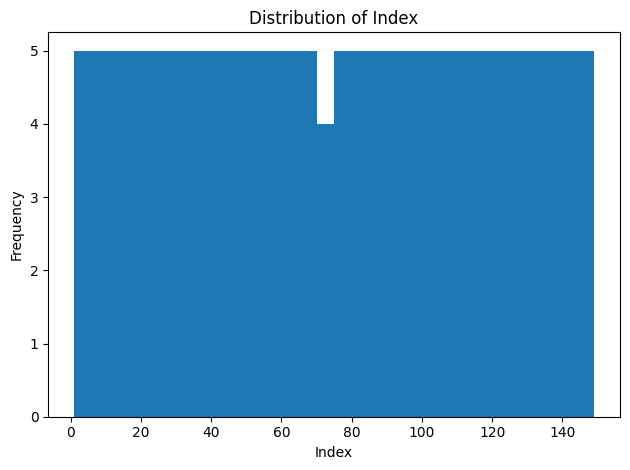

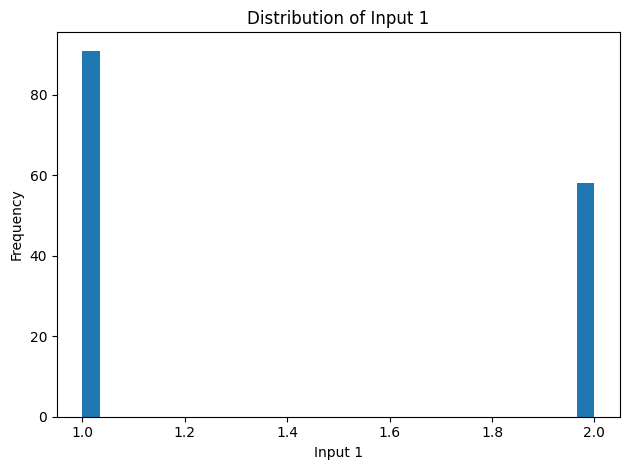

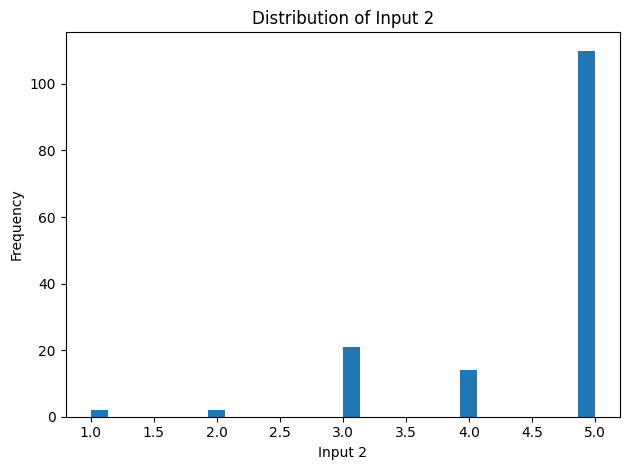

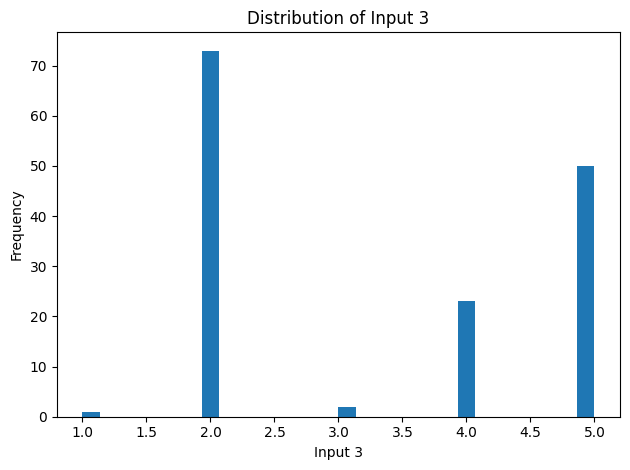

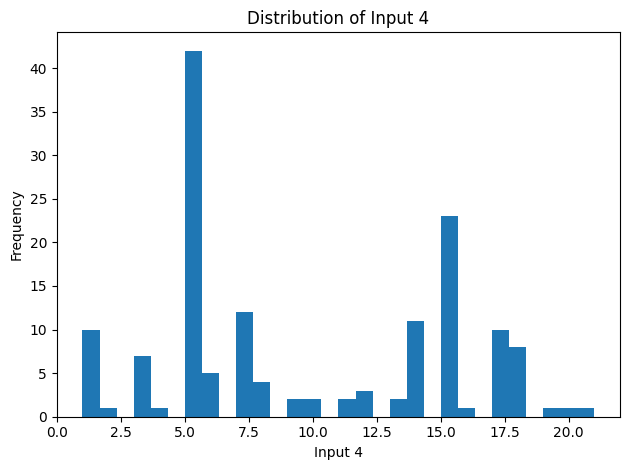

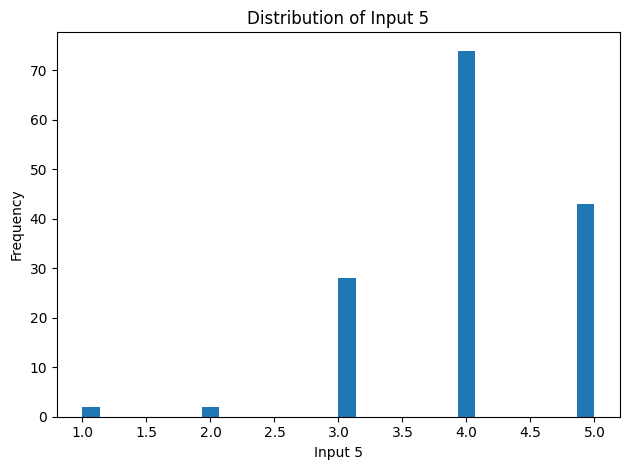

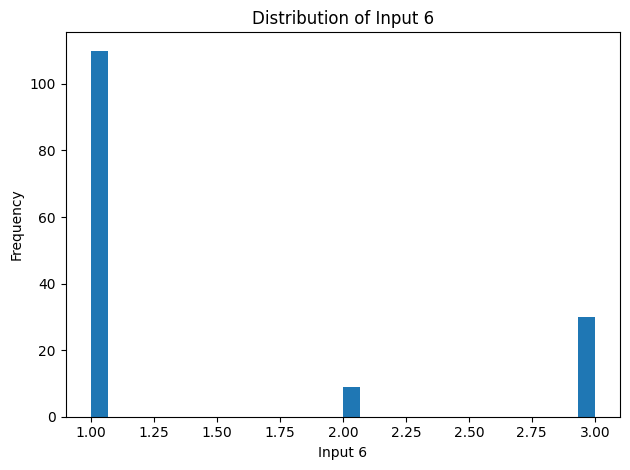

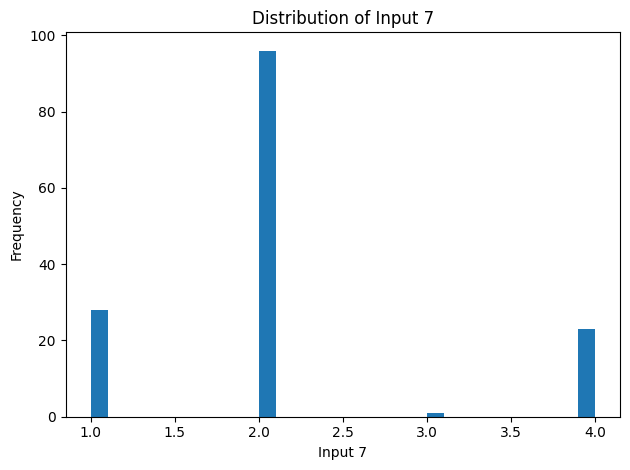

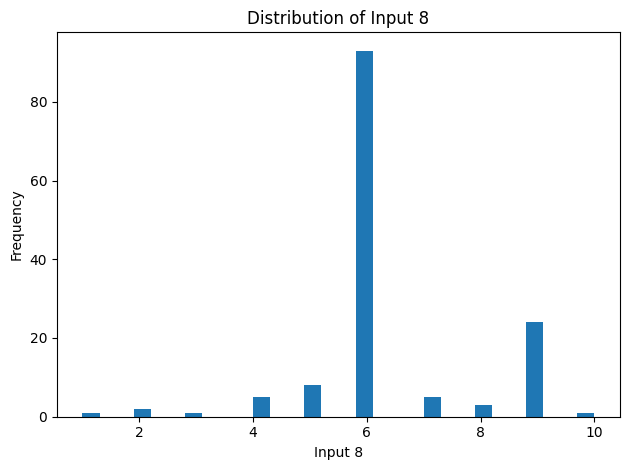

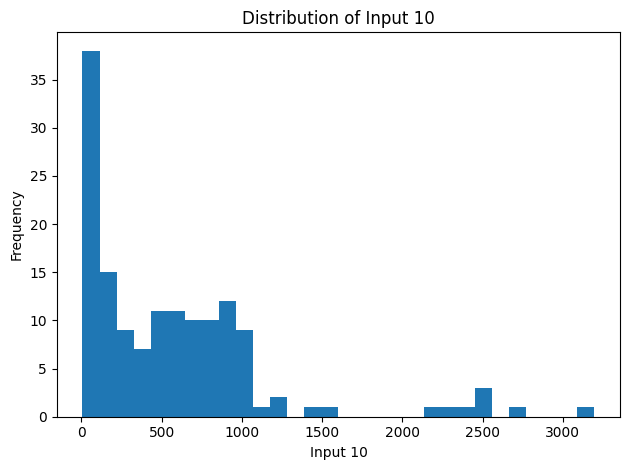

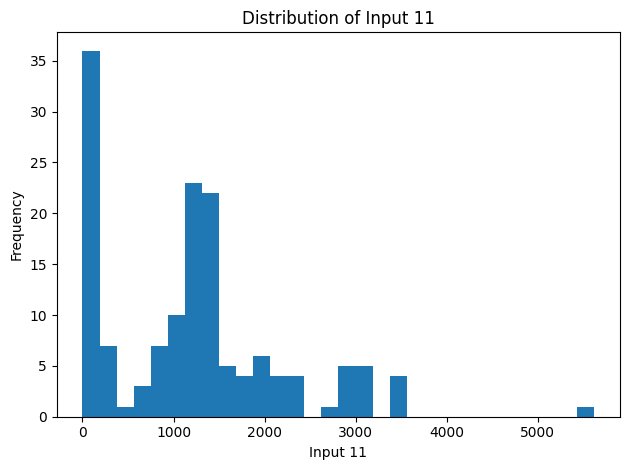

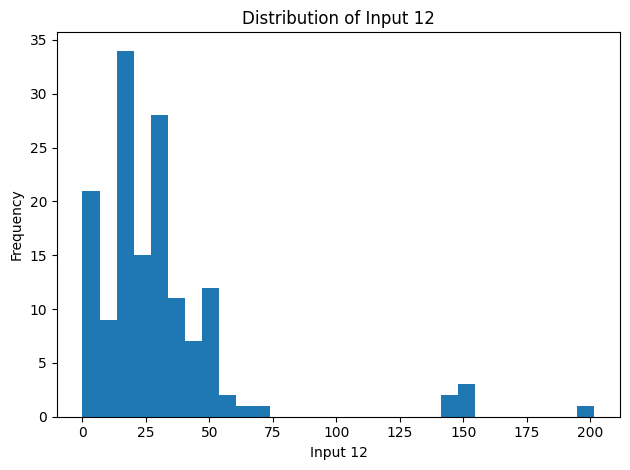

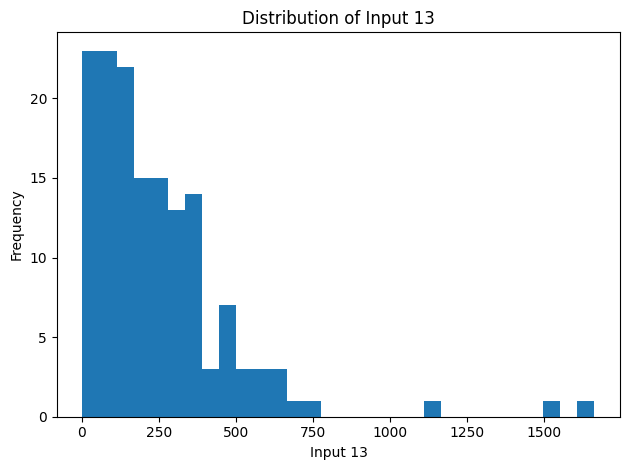

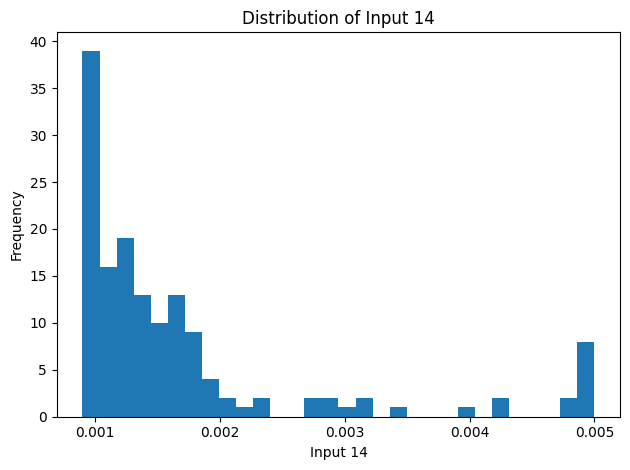

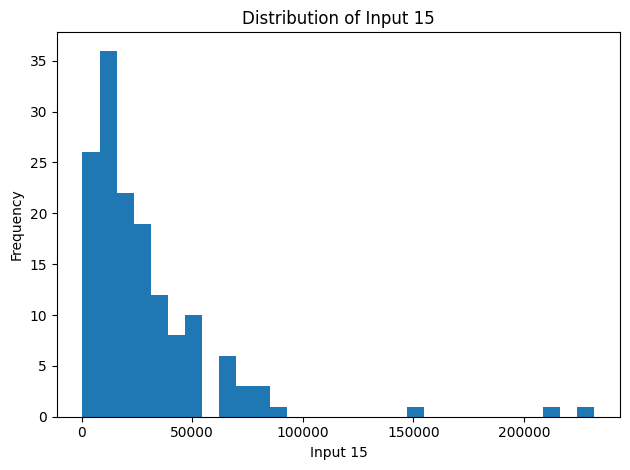

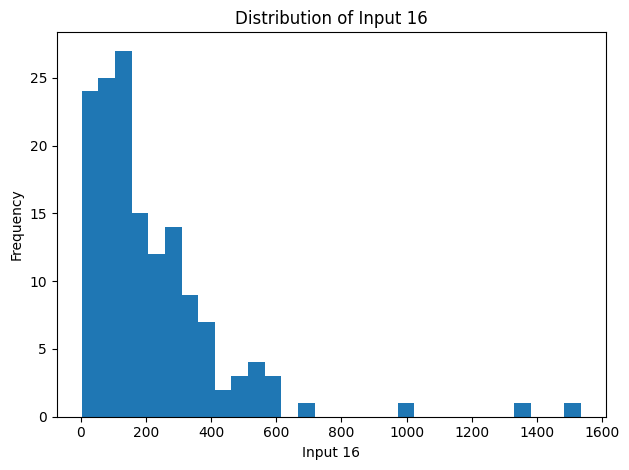

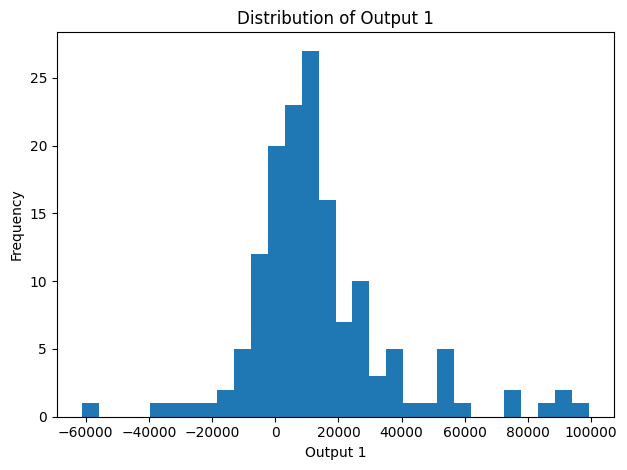

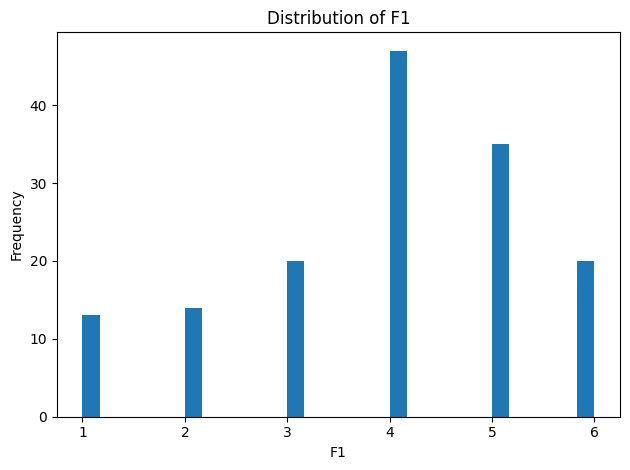

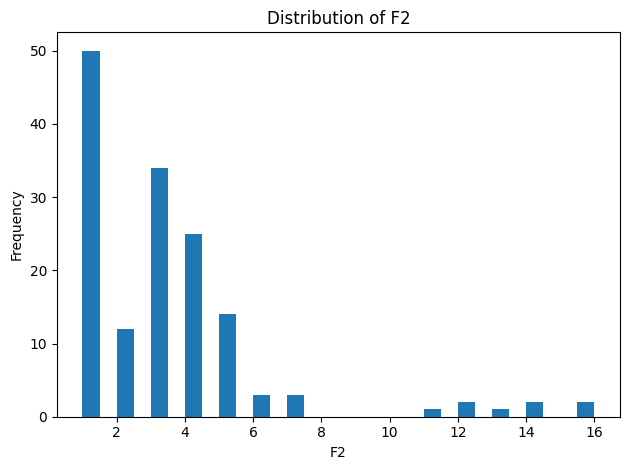

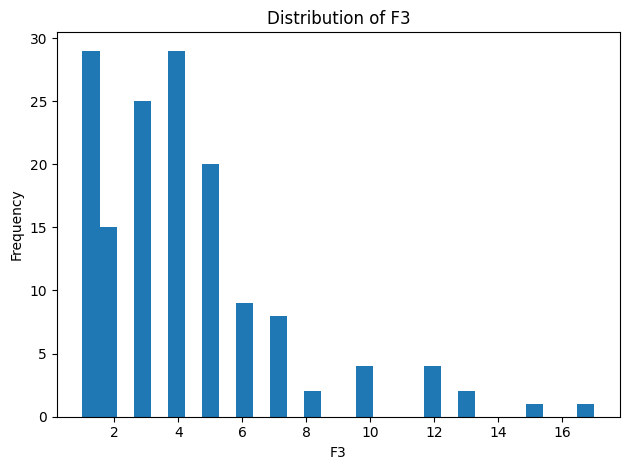

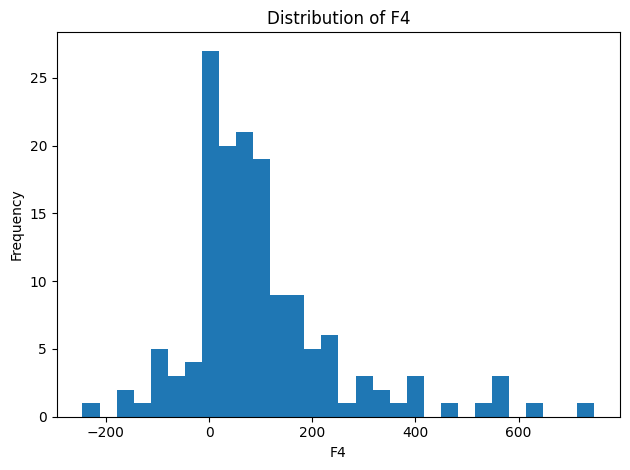

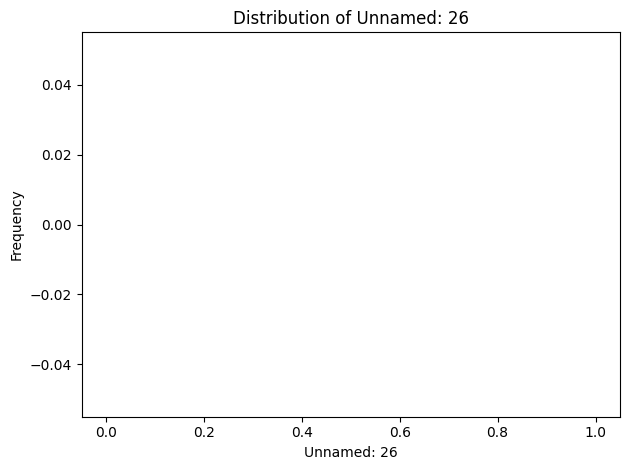

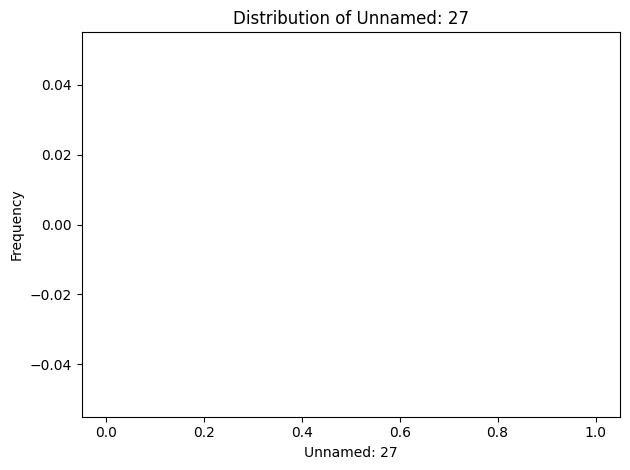

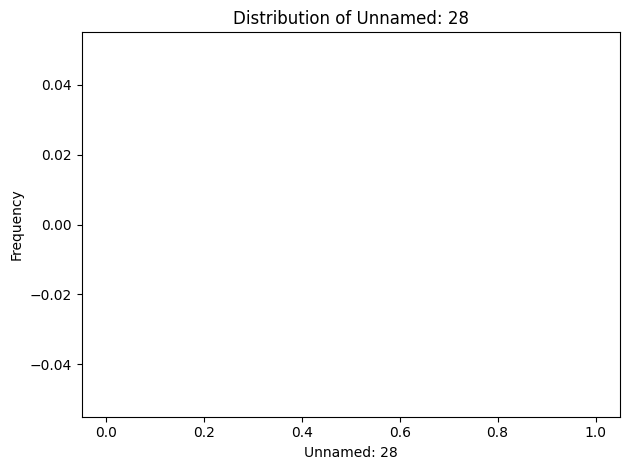

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the training+validation data
df = pd.read_csv('/home/kamiar/chevron/Acid-neural-net/data/test_data_nn(SampleData_07032025_vf3).csv')

# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Plot a histogram for each numeric column
for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
